In [127]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['CarPrice_Assignment.csv', 'Data Dictionary - carprices.xlsx']


In [128]:
df=pd.read_csv('../input/CarPrice_Assignment.csv')

In [129]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [130]:
## Seperate the compay name from the car name
df['company']=df.CarName.apply(lambda x:x.split()[0])

In [131]:
# I wrote function to make car name to just the name of the model
def WordReplace(x,y):
    return x.replace(y+' ','')

In [132]:
# use the WordReplace to convert carname to just the model name
df['CarName']=df.apply(lambda x:WordReplace(x.CarName,x.company),axis=1)

In [133]:
# set car_id as the index of the table, if you add df.head(), we can see the new 
df.set_index('car_ID',inplace=True);

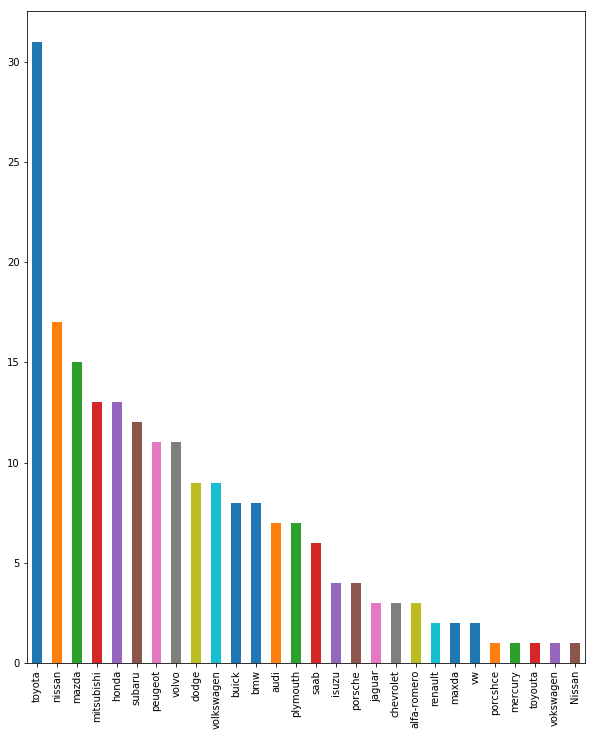

In [134]:
# Just to check who is producing more models, looks like Toyota leads the board with 30 models
df['company'].value_counts().plot('bar',figsize=(10,12))

In [135]:
def NameToNumber(x):
    return {'four':4,'six':6,'five':5,'eight':8,'two':2,'twelve':12,'three':3}[x]

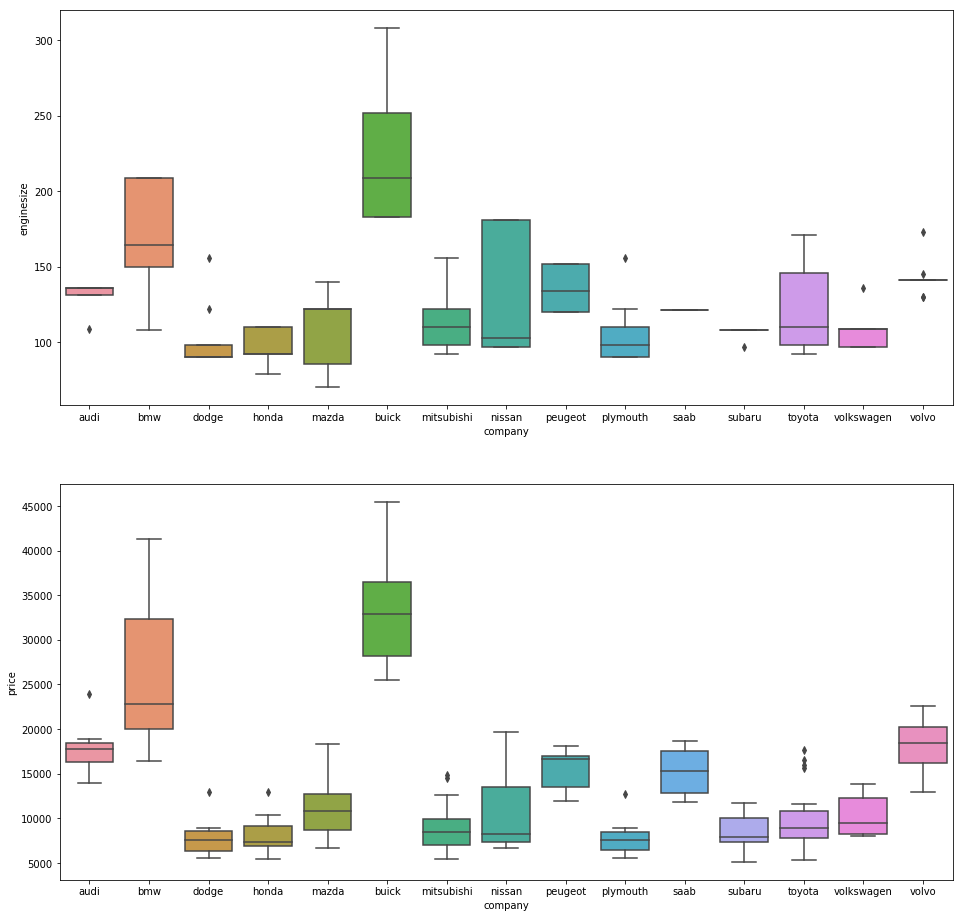

In [136]:
fig,ax=plt.subplots(2,1,figsize=(16,16))
s=df['company'].value_counts()
s[s>4].index
#print(s[s>4].index)
sns.boxplot(x='company',y='enginesize',data=df[df.company.isin(s[s>5].index)],ax=ax[0])
sns.boxplot(x='company',y='price',data=df[df.company.isin(s[s>5].index)],ax=ax[1])

## so the saab,toyota,and volvo use the same engine for the all the cars in the country
## audi,dodge,plymoth and VW also seems to use the same engine with small variation
## bmw,buck,nissan,toyota uses a very wide range of engines


In [ ]:
# change the cylinder number from categorical to numerical

df['cylindernumber']=df.cylindernumber.apply(lambda x:NameToNumber(x))


# Delete the following columns as they won't have any categories

df.drop(columns=['symboling','CarName','aspiration','enginetype','fuelsystem'],inplace=True)
corr=df.corr(method='pearson')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# getting columns with correlation greater than 0.6
print(corr.loc['price',np.absolute(corr.loc['price',:])>0.6])

# columns with the numerical datas
p=corr.loc['price',np.absolute(corr.loc['price',:])>0.6].keys()
s=df.dtypes

# Getting columns whose datatype is categorical
print('columns with categorical data',s[s=='object'].keys())



In [117]:
# get dummy variables for the categories
df_categories=pd.get_dummies(df[s[s=='object'].keys()])

In [118]:
# Drop the categorical columns from teh df as the dummy variables are created
df=df.drop(columns=(s[s=='object'].keys()),axis=1)

In [119]:
# create the dataframe numerical columns

df_numbers=df[p]

# create the df2 with the set of numerical and category datasframes

df2=df_numbers.join(df_categories)

In [120]:
df2.head()

,carlength,carwidth,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,company_Nissan,company_alfa-romero,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_maxda,company_mazda,company_mercury,company_mitsubishi,company_nissan,company_peugeot,company_plymouth,company_porcshce,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_toyouta,company_vokswagen,company_volkswagen,company_volvo,company_vw
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,168.8,64.1,2548,4,130,111,21,27,13495.0,0,1,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,168.8,64.1,2548,4,130,111,21,27,16500.0,0,1,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,171.2,65.5,2823,6,152,154,19,26,16500.0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,176.6,66.2,2337,4,109,102,24,30,13950.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,176.6,66.4,2824,5,136,115,18,22,17450.0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [121]:
X=df2.drop(columns=['price'],axis=1).values
Y=df2.price.values

In [122]:
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.1, random_state=42,shuffle=True)

In [123]:
pipeline=Pipeline([('scaler',MinMaxScaler()),('Regressor',LinearRegression())])

In [124]:
pipeline.fit(X_train,y_train)
scores=cross_val_score(estimator=pipeline,X=X_train,y=y_train,cv=5,scoring='r2')

In [125]:
print(scores)
print('mean score:',scores.mean())

[0.77347873 0.92762415 0.85341847 0.9109424  0.87229321]
mean score: 0.8675513927583374


In [126]:
# Testing on data which the model has not seen before
r2_score(y_test,pipeline.predict(X_test))

0.9365531861780464